In [ ]:
#Prediction of Goal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-null object
type_of_shot             15417 non-

In [6]:
df.shape

(30697, 27)

In [7]:
df.isnull().sum()

match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [8]:
df.is_goal.value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [9]:
df.drop(['match_id','team_id','team_name','shot_id_number','match_event_id'],axis=1,inplace=True)

In [10]:
df.drop(['game_season'],axis=1,inplace=True)

In [11]:
df.drop(['power_of_shot','remaining_min','knockout_match','remaining_sec','distance_of_shot'],axis=1,inplace=True)

In [12]:
df.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,lat/lng,type_of_shot,type_of_combined_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,167.0,72.0,NaN,Right Side(R),Mid Range,16-24 ft.,10/31/2000,MANU @ POR,"45.539131, -122.651648",shot - 30,NaN,10.00,1.0,50.608,54.2000,38.0
1,-157.0,0.0,0.0,Left Side(L),Mid Range,8-16 ft.,10/31/2000,MANU @ POR,"45.539131, -122.651648",shot - 45,NaN,10.00,1.0,28.800,22.0000,35.0
2,-101.0,135.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,10/31/2000,NaN,"45.539131, -122.651648",shot - 25,NaN,92.64,1.0,0.000,63.7216,54.4
3,138.0,175.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,10/31/2000,MANU @ POR,"45.539131, -122.651648",NaN,shot - 3,NaN,1.0,122.608,52.0000,42.0
4,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.,10/31/2000,MANU @ POR,"45.539131, -122.651648",NaN,shot - 1,42.64,2.0,0.000,19.0000,20.0


In [13]:
df.drop(['lat/lng','date_of_game'],axis=1,inplace=True)

In [14]:
df.shape

(30697, 14)

In [15]:
df.isnull().sum()

location_x                1461
location_y                1540
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
home/away                 1497
type_of_shot             15280
type_of_combined_shot    15417
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [16]:
df2=df.drop(['type_of_shot','type_of_combined_shot'],axis=1)

In [17]:
df2.isnull().sum()

location_x            1461
location_y            1540
is_goal               6268
area_of_shot          1502
shot_basics           1575
range_of_shot         1564
home/away             1497
remaining_min.1       1535
power_of_shot.1       1539
knockout_match.1      1493
remaining_sec.1       1539
distance_of_shot.1    1568
dtype: int64

In [18]:
df2.shape

(30697, 12)

In [19]:
df2.dropna(inplace=True)

In [20]:
df2.shape

(13936, 12)

In [21]:
df2.is_goal.value_counts()

0.0    7724
1.0    6212
Name: is_goal, dtype: int64

In [22]:
df2.isnull().sum()

location_x            0
location_y            0
is_goal               0
area_of_shot          0
shot_basics           0
range_of_shot         0
home/away             0
remaining_min.1       0
power_of_shot.1       0
knockout_match.1      0
remaining_sec.1       0
distance_of_shot.1    0
dtype: int64

In [23]:
counts=df2.area_of_shot.value_counts()
counts

Center(C)                6156
Right Side Center(RC)    2162
Right Side(R)            2079
Left Side Center(LC)     1840
Left Side(L)             1664
Mid Ground(MG)             35
Name: area_of_shot, dtype: int64

In [24]:
import seaborn as sns
sns.set(style='darkgrid')

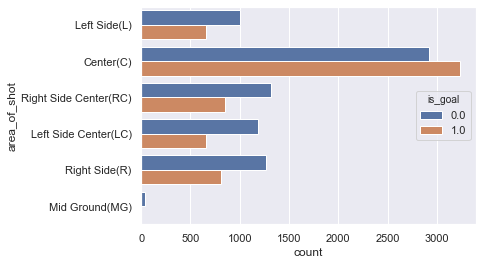

In [25]:
sns.countplot(y=df2.area_of_shot,data=df2,hue='is_goal')

In [26]:
df2.shot_basics.value_counts()

Mid Range          5656
Goal Area          3220
Penalty Spot       2604
Goal Line          2128
Right Corner        186
Left Corner         115
Mid Ground Line      27
Name: shot_basics, dtype: int64

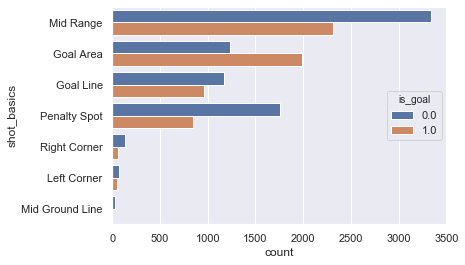

In [27]:
sns.countplot(y=df2.shot_basics,data=df2,hue='is_goal')

In [28]:
df2.range_of_shot.value_counts()

Less Than 8 ft.    4268
16-24 ft.          3696
8-16 ft.           3040
24+ ft.            2897
Back Court Shot      35
Name: range_of_shot, dtype: int64

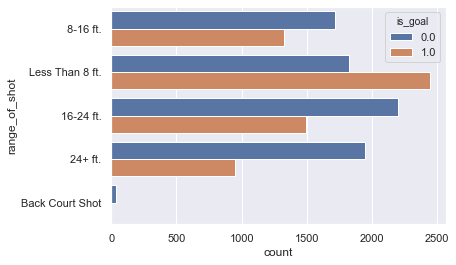

In [29]:
sns.countplot(y=df2.range_of_shot,data=df2,hue='is_goal')

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13936 entries, 1 to 30694
Data columns (total 12 columns):
location_x            13936 non-null float64
location_y            13936 non-null float64
is_goal               13936 non-null float64
area_of_shot          13936 non-null object
shot_basics           13936 non-null object
range_of_shot         13936 non-null object
home/away             13936 non-null object
remaining_min.1       13936 non-null float64
power_of_shot.1       13936 non-null float64
knockout_match.1      13936 non-null float64
remaining_sec.1       13936 non-null float64
distance_of_shot.1    13936 non-null float64
dtypes: float64(8), object(4)
memory usage: 2.0+ MB


In [31]:
df2['home/away'].value_counts()

MANU @ SAS      444
MANU @ PHX      422
MANU vs. SAS    414
MANU @ SAC      401
MANU @ DEN      385
MANU vs. HOU    384
MANU @ POR      372
MANU vs. PHX    368
MANU @ HOU      367
MANU vs. DEN    354
MANU vs. SAC    345
MANU vs. POR    344
MANU vs. UTA    336
MANU vs. MIN    333
MANU @ MIN      332
MANU @ UTA      327
MANU @ GSW      316
MANU vs. LAC    301
MANU @ DAL      299
MANU vs. GSW    293
MANU @ LAC      268
MANU vs. DAL    257
MANU @ MEM      245
MANU vs. MEM    238
MANU @ BOS      225
MANU @ PHI      201
MANU @ SEA      198
MANU vs. BOS    191
MANU vs. IND    191
MANU @ ORL      186
               ... 
MANU vs. ORL    141
MANU @ OKC      140
MANU @ MIA      138
MANU @ CHI      137
MANU vs. MIL    134
MANU @ MIL      133
MANU vs. CLE    130
MANU @ ATL      129
MANU @ NOH      128
MANU vs. NOH    124
MANU @ NJN      120
MANU vs. WAS    120
MANU vs. ATL    111
MANU vs. NJN    111
MANU @ CHA      107
MANU vs. CHA     94
MANU @ VAN       60
MANU vs. NOK     53
MANU vs. VAN     52


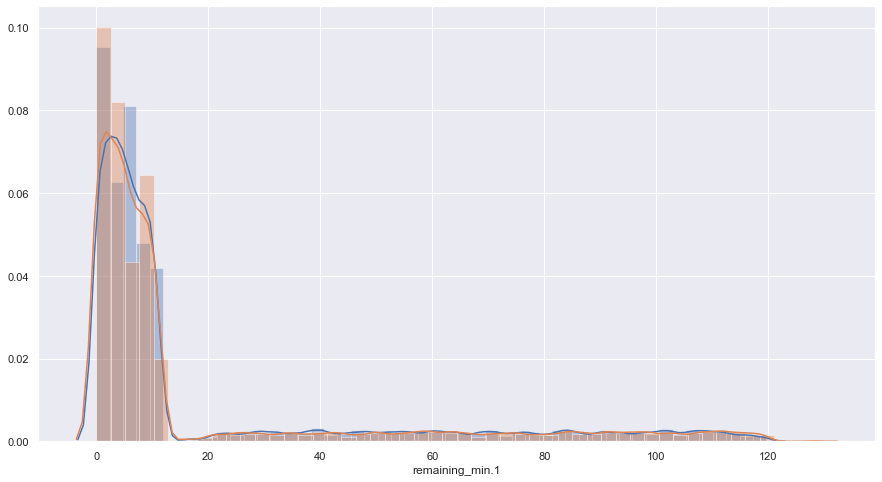

In [32]:
#temp_df=df[df.is_goal.astype('int').dropna()==1]
plt.figure(figsize=(15,8))
sns.distplot(df2[df2.is_goal.astype('int')==1]['remaining_min.1'])
sns.distplot(df2[df2.is_goal.astype('int')!=1]['remaining_min.1'])

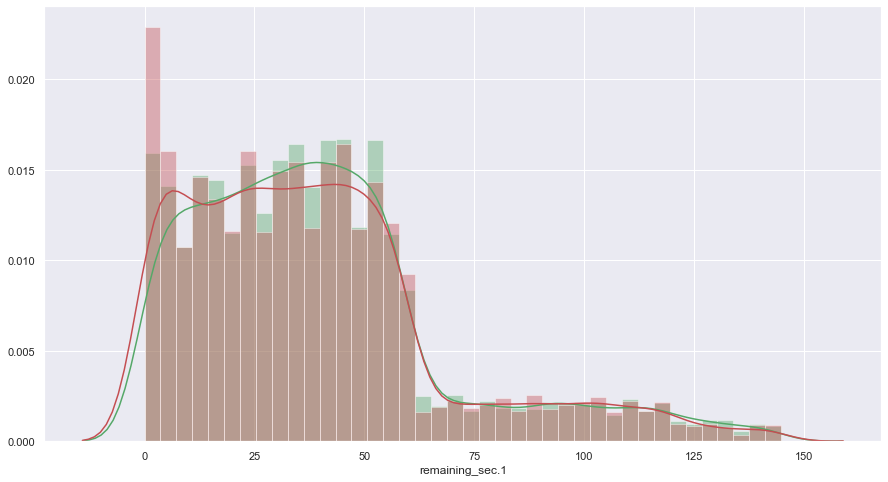

In [33]:
#temp_df=df[df.is_goal.astype('int').dropna()==1]
plt.figure(figsize=(15,8))
sns.distplot(df2[df2.is_goal.astype('int')==1]['remaining_sec.1'],color='g')
sns.distplot(df2[df2.is_goal.astype('int')!=1]['remaining_sec.1'],color='r')

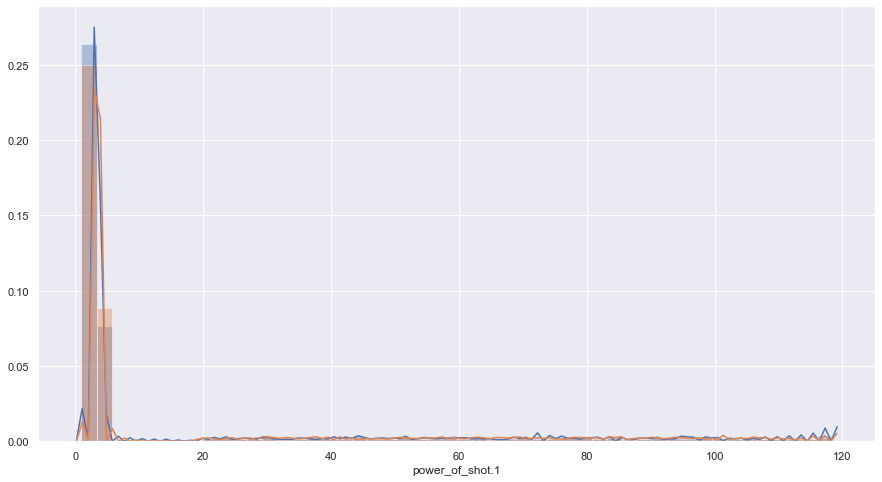

In [34]:
plt.figure(figsize=(15,8))
sns.distplot(df2[df2.is_goal.astype('int')==1]['power_of_shot.1'])
sns.distplot(df2[df2.is_goal.astype('int')!=1]['power_of_shot.1'])

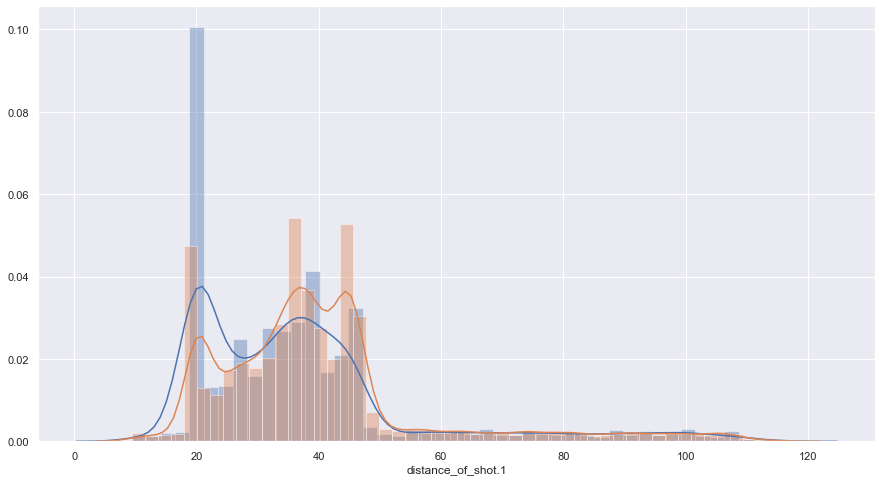

In [35]:
plt.figure(figsize=(15,8))
sns.distplot(df2[df2.is_goal.astype('int')==1]['distance_of_shot.1'])
sns.distplot(df2[df2.is_goal.astype('int')!=1]['distance_of_shot.1'])

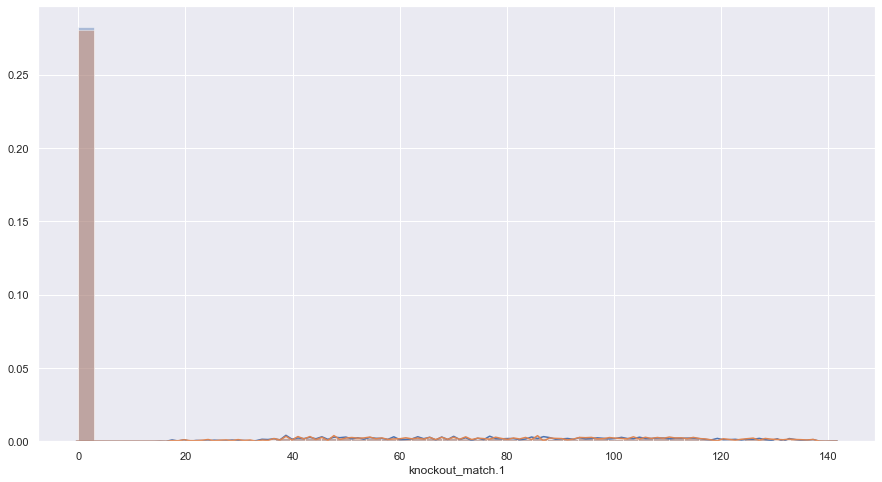

In [36]:
#temp_df=df[df.is_goal.astype('int').dropna()==1]
plt.figure(figsize=(15,8))
sns.distplot(df2[df2.is_goal.astype('int')==1]['knockout_match.1'])
sns.distplot(df2[df2.is_goal.astype('int')!=1]['knockout_match.1'])

In [37]:
df2.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,-157.0,0.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,10.00,1.00,28.800,22.0000,35.0
4,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,42.64,2.00,0.000,19.0000,20.0
6,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,8.00,3.00,0.000,112.2000,89.4
11,121.0,127.0,1.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU vs. UTA,11.00,1.00,106.608,64.7856,16.4
13,-94.0,4.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU vs. UTA,2.00,68.36,0.000,44.0000,29.0


In [38]:
df3=df2.iloc[:,:-6]

In [39]:
df3.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot
1,-157.0,0.0,0.0,Left Side(L),Mid Range,8-16 ft.
4,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.
6,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.
11,121.0,127.0,1.0,Right Side Center(RC),Mid Range,16-24 ft.
13,-94.0,4.0,0.0,Left Side(L),Mid Range,8-16 ft.


In [40]:
x=df3.drop(['is_goal'],axis=1)

In [41]:
y=df3.is_goal

## Data preprocessing

In [42]:
x.area_of_shot.value_counts()

Center(C)                6156
Right Side Center(RC)    2162
Right Side(R)            2079
Left Side Center(LC)     1840
Left Side(L)             1664
Mid Ground(MG)             35
Name: area_of_shot, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
ar_encod=LabelEncoder()
ar_encod.fit(x.area_of_shot)

LabelEncoder()

In [44]:
x.area_of_shot=ar_encod.transform(x.area_of_shot)

In [45]:
x.head()

,location_x,location_y,area_of_shot,shot_basics,range_of_shot
1,-157.0,0.0,2,Mid Range,8-16 ft.
4,0.0,0.0,0,Goal Area,Less Than 8 ft.
6,0.0,0.0,0,Goal Area,Less Than 8 ft.
11,121.0,127.0,4,Mid Range,16-24 ft.
13,-94.0,4.0,2,Mid Range,8-16 ft.


In [46]:
sb_encod=LabelEncoder()
sb_encod.fit(x.shot_basics)
x.shot_basics=sb_encod.transform(x.shot_basics)

In [47]:
x.head()

,location_x,location_y,area_of_shot,shot_basics,range_of_shot
1,-157.0,0.0,2,4,8-16 ft.
4,0.0,0.0,0,0,Less Than 8 ft.
6,0.0,0.0,0,0,Less Than 8 ft.
11,121.0,127.0,4,4,16-24 ft.
13,-94.0,4.0,2,4,8-16 ft.


In [48]:
rs_encod=LabelEncoder()
rs_encod.fit(x.range_of_shot)
x.range_of_shot=rs_encod.transform(x.range_of_shot)

In [49]:
x.head()

,location_x,location_y,area_of_shot,shot_basics,range_of_shot
1,-157.0,0.0,2,4,2
4,0.0,0.0,0,0,4
6,0.0,0.0,0,0,4
11,121.0,127.0,4,4,0
13,-94.0,4.0,2,4,2


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
def build_model(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
    sc_x=StandardScaler()
    pipe=Pipeline([
        ('scaler',sc_x),
        ('model',model)
    ])
    scores=cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    print('mean_score:',scores.mean())
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    print('roc_auc_score:',metrics.roc_auc_score(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.confusion_matrix(y_test,y_pred))
    
    return pipe

In [51]:
# find out if the data is linear or not linear
from sklearn.svm import SVC
non_linear_clf=SVC(kernel='rbf',probability=True)

In [52]:
non_linear_clf=build_model(non_linear_clf,x,y)

mean_score: 0.6074743572153386
roc_auc_score: 0.5767753855487304
              precision    recall  f1-score   support

         0.0       0.61      0.83      0.70      2556
         1.0       0.60      0.32      0.42      2043

    accuracy                           0.61      4599
   macro avg       0.60      0.58      0.56      4599
weighted avg       0.60      0.61      0.58      4599

[[2124  432]
 [1384  659]]


In [53]:
df2.shape

(13936, 12)

In [54]:
df.shape

(30697, 14)

In [55]:
df.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,type_of_shot,type_of_combined_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,167.0,72.0,NaN,Right Side(R),Mid Range,16-24 ft.,MANU @ POR,shot - 30,NaN,10.00,1.0,50.608,54.2000,38.0
1,-157.0,0.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,shot - 45,NaN,10.00,1.0,28.800,22.0000,35.0
2,-101.0,135.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,shot - 25,NaN,92.64,1.0,0.000,63.7216,54.4
3,138.0,175.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,NaN,shot - 3,NaN,1.0,122.608,52.0000,42.0
4,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,NaN,shot - 1,42.64,2.0,0.000,19.0000,20.0


In [56]:
df.isnull().sum()

location_x                1461
location_y                1540
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
home/away                 1497
type_of_shot             15280
type_of_combined_shot    15417
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [57]:
df.area_of_shot.fillna(df.area_of_shot.mode()[0],inplace=True)

In [58]:
def fill_mode(df,columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0],inplace=True)
    return df
def fill_mean(df,columns):
    for column in columns:
        df[column].fillna(df[column].mean(),inplace=True)
    return df   
    

In [59]:
df=fill_mode(df,['shot_basics','range_of_shot'])

In [60]:
df=fill_mean(df,['location_x','location_y'])

In [61]:
df.isnull().sum()

location_x                   0
location_y                   0
is_goal                   6268
area_of_shot                 0
shot_basics                  0
range_of_shot                0
home/away                 1497
type_of_shot             15280
type_of_combined_shot    15417
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [62]:
df4=df.iloc[:,:-8]

In [63]:
df4.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot
0,167.0,72.0,NaN,Right Side(R),Mid Range,16-24 ft.
1,-157.0,0.0,0.0,Left Side(L),Mid Range,8-16 ft.
2,-101.0,135.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.
3,138.0,175.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.
4,0.0,0.0,1.0,Center(C),Goal Area,Less Than 8 ft.


In [64]:
df5=df4[df.is_goal.isnull()]
df4=df4[~df4.is_goal.isnull()]

In [65]:
df4.isnull().sum()

location_x       0
location_y       0
is_goal          0
area_of_shot     0
shot_basics      0
range_of_shot    0
dtype: int64

In [66]:
df4.area_of_shot=ar_encod.fit_transform(df4.area_of_shot)
df4.shot_basics=sb_encod.fit_transform(df4.shot_basics)
df4.range_of_shot=rs_encod.fit_transform(df4.range_of_shot)

In [67]:
df4.isnull().sum()

location_x       0
location_y       0
is_goal          0
area_of_shot     0
shot_basics      0
range_of_shot    0
dtype: int64

In [68]:
df4.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot
1,-157.0,0.0,0.0,2,4,2
2,-101.0,135.0,1.0,1,4,0
3,138.0,175.0,0.0,4,4,0
4,0.0,0.0,1.0,0,0,4
5,-145.0,-11.0,0.0,2,4,2


In [69]:
x2=df4.drop(['is_goal'],axis=1)
y2=df4.is_goal

In [70]:
nln_pipe=build_model(non_linear_clf,x2,y2)

mean_score: 0.6097627089781696
roc_auc_score: 0.5805442238213341
              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70      4414
         1.0       0.62      0.32      0.42      3648

    accuracy                           0.61      8062
   macro avg       0.61      0.58      0.56      8062
weighted avg       0.61      0.61      0.57      8062

[[3713  701]
 [2481 1167]]


In [95]:
nln_pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('model',
                                  SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='rbf', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False))],
                          verbose=False))],
         verbose=False)

In [71]:
df5.head()

,location_x,location_y,is_goal,area_of_shot,shot_basics,range_of_shot
0,167.0,72.0,NaN,Right Side(R),Mid Range,16-24 ft.
7,1.0,28.0,NaN,Center(C),Goal Area,Less Than 8 ft.
16,0.0,0.0,NaN,Center(C),Goal Area,Less Than 8 ft.
19,0.0,0.0,NaN,Center(C),Mid Range,Less Than 8 ft.
21,134.0,127.0,NaN,Right Side Center(RC),Mid Range,16-24 ft.


In [72]:
df5.drop(['is_goal'],axis=1,inplace=True)

In [73]:
df5.area_of_shot=ar_encod.transform(df5.area_of_shot)

In [74]:
df5.shot_basics=sb_encod.transform(df5.shot_basics)
df5.range_of_shot=rs_encod.transform(df5.range_of_shot)

In [75]:
predicts=nln_pipe.predict_proba(df5)
probs=predicts[:,:1]

In [77]:
probs.shape

(6268, 1)

In [78]:
sub_df=pd.DataFrame()

In [79]:
sample_df=pd.read_csv('sample_submission.csv')

In [80]:
sample_df.head()

,shot_id_number,is_goal
0,1,0.1
1,8,0.1
2,17,0.1
3,20,0.1
4,33,0.1


In [81]:
df6=pd.read_csv('data.csv') 

In [82]:
df6=df6[df6.is_goal.isnull()]

In [83]:
sub_df['shot_id_number']=df6.shot_id_number

In [84]:
sub_df['is_goal']=probs

In [85]:
sub_df.head()

,shot_id_number,is_goal
0,1.0,0.610760
7,8.0,0.384723
16,NaN,0.384166
19,20.0,0.384240
21,22.0,0.610772


In [86]:
sub_df.isnull().sum()

shot_id_number    313
is_goal             0
dtype: int64

In [87]:
sub_df.shot_id_number=sub_df.index+1

In [88]:
sub_df.head()

,shot_id_number,is_goal
0,1,0.610760
7,8,0.384723
16,17,0.384166
19,20,0.384240
21,22,0.610772


In [89]:
sub_df.to_csv('non-svm-sub.csv',index=False)

In [90]:
sub_df=pd.read_csv('non-svm-sub.csv')

In [91]:
sub_df

,shot_id_number,is_goal
0,1,0.610760
1,8,0.384723
2,17,0.384166
3,20,0.384240
4,22,0.610772
5,33,0.610764
6,34,0.610762
7,35,0.384462
8,36,0.383245
9,37,0.384122
